## LOGISTIC REGRESSION

Regresi logistik mirip dengan regresi linier, mereka sama-sama memiliki garis regresi, kecuali : regresi logistik digunakan untuk memprediksi apakah sesuatu bernilai benar atau salah, ketimbang memprediksi suatu nilai yang kontinu.

Sekarang mari kita pertimbangkan skenario di mana Anda harus mengklasifikasikan apakah seseorang akan membeli mobil atau tidak. Dalam kasus ini, jika kita menggunakan regresi linier sederhana, kita perlu menentukan ambang batas untuk melakukan klasifikasi.
Misalkan kelas sebenarnya adalah orang yang akan membeli mobil, dan nilai prediksi kontinu adalah 0,45 dan ambang batas yang telah kita pertimbangkan adalah 0,5, maka poin data ini akan dianggap sebagai orang yang tidak akan membeli mobil dan ini akan mengarah pada kesalahan prediksi.
Jadi kami menyimpulkan bahwa kami tidak dapat menggunakan regresi linier untuk jenis masalah klasifikasi ini. Seperti yang kita ketahui regresi linier dibatasi, Jadi inilah regresi logistik di mana nilai berkisar dari 0 hingga 1.
                                                           
##### Simple Logistic Regression:                               
Output:  0 or 1                                           
Hypothesis:  K = W * X + B                                 
hΘ(x) = sigmoid(K)
#### Sigmoid Function:
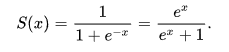
### Types of Logistic Regression:
##### Binary Logistic Regression
Hanya dua kemungkinan hasil(Category).
Example: Orang tersebut akan membeli mobil atau tidak.
##### Multinomial Logistic Regression
Lebih dari dua Kategori dimungkinkan tanpa pemesanan.
##### Ordinal Logistic Regression
Lebih dari dua Kategori dimungkinkan dengan pemesanan.
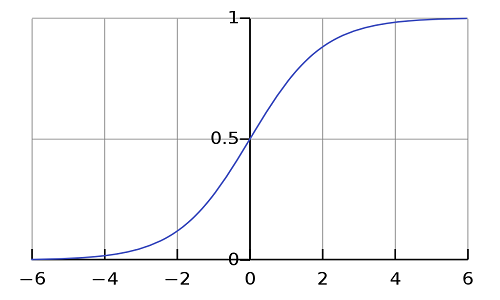

### 1. Importing the libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

### 2. Importing the Data set

In [12]:
dataset = pd.read_csv('Social_Network_Ads.csv')


### 3. Splitting our Data set in Dependent and Independent variables.

Dalam kumpulan Data kami, kami akan mempertimbangkan Age dan EstimatedSalary sebagai variabel Independen dan Purchased sebagai Variabel Dependen.

In [13]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [14]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### 4. Splitting the Data set into the Training Set and Test Set

Sekarang kita akan membagi kumpulan Data menjadi Training Data and Test Data. Training data akan digunakan untuk melatih
Model logistik dan data Uji akan digunakan untuk memvalidasi model . Disini akan menggunakan Sklearn untuk membagi data. Kita 
akan mengimpor train_test_split dari sklearn.model_selection

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### 5. Feature Scaling

Sekarang kita akan melakukan penskalaan fitur untuk menskalakan data kita antara 0 dan 1 untuk mendapatkan akurasi yang lebih baik.
Di sini Scaling penting karena terdapat perbedaan besar antara Age dan EstimatedSalay.

- Impor StandardScaler dari sklearn.preprocessing
- Kemudian buat instance sc_X dari objek StandardScaler
- Kemudian pasang dan transform X_train dan transform X_test

In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### 6. Fitting Logistic Regression to the Training Set

Sekarang kita akan membuat pengklasifikasi kita (Logistik).
- Impor LogisticRegression dari sklearn.linear_model
- Buat pengklasifikasi instance dari objek LogisticRegression dan berikan random_state = 0 untuk mendapatkan hasil yang sama setiap saat.
- Sekarang gunakan pengklasifikasi ini agar sesuai dengan X_train dan y_train

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Setelah menjalankan perintah di atas, Anda akan memiliki pengklasifikasi yang dapat memprediksi apakah seseorang akan membeli mobil atau tidak.

Sekarang gunakan pengklasifikasi untuk membuat prediksi untuk kumpulan Data Pengujian dan temukan akurasinya menggunakan matriks Confusion.

### 7. Predicting the Test set results

In [18]:
y_pred = classifier.predict(X_test)

### 8.  Making the Confusion Matrix

Sekarang kita bisa menggunakan y_test (Hasil Aktual) dan y_pred (Hasil Prediksi) untuk mendapatkan akurasi model kita.

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[65  3]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



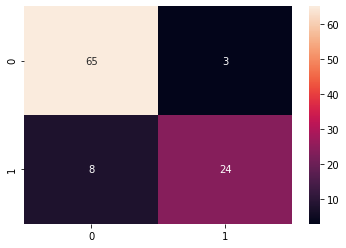

In [20]:
sn.heatmap(cm, annot=True)

### Visualizing the Training Set result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


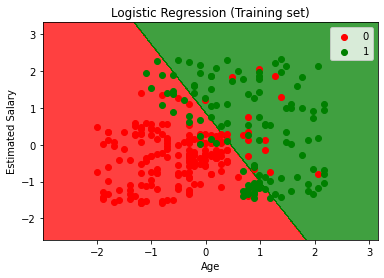

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1,   step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualizing the Test Set result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


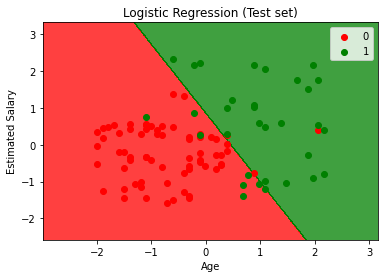

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

https://www.kaggle.com/rakeshrau/social-network-ads